# PART II

This notebook will evaluate two business questions:

- What are the accommodation information most correlated to price variation?
- Is possible to predict the price for respective acomodation according it features? 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

#Data **Understanding**

For this analysis, is going to be used the database with more information regarding accommodations.

In [2]:
bc_general = pd.read_csv(r'/content/drive/MyDrive/Vancouver/listings.csv')

In [3]:
bc_general.head(10)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10080,https://www.airbnb.com/rooms/10080,20201106040232,2020-11-06,D1 - Million Dollar View 2 BR,"Stunning two bedroom, two bathroom apartment. ...",NaN,https://a0.muscache.com/pictures/55778229/c2f7...,30899,https://www.airbnb.com/users/show/30899,Rami,2009-08-10,"Vancouver, British Columbia, Canada",I will be happy to host you.,within an hour,100%,92%,f,https://a0.muscache.com/im/pictures/user/55302...,https://a0.muscache.com/im/pictures/user/55302...,Coal Harbour,49,49,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Downtown,NaN,49.28772,-123.12279,Entire condominium,Entire home/apt,5,NaN,2 baths,2.0,2.0,"[""Dishwasher"", ""TV"", ""Washer"", ""Cable TV"", ""El...",$150.00,90,1124,90,90,1124,1124,90.0,1124.0,NaN,t,4,34,64,339,2020-11-06,16,0,0,2011-11-15,2017-02-26,93.0,9.0,9.0,10.0,9.0,10.0,9.0,18-476608,f,46,46,0,0,0.15
1,13358,https://www.airbnb.com/rooms/13358,20201106040232,2020-11-06,Monthly (or Longer ) Designer One Bedroom Down...,<b>The space</b><br />This suites central loca...,NaN,https://a0.muscache.com/pictures/c23bb7ef-e300...,52116,https://www.airbnb.com/users/show/52116,Lynn,2009-11-07,"Vancouver, British Columbia, Canada",I am from Vancouver and in my free time enjoy ...,within a day,80%,83%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Downtown Vancouver,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",f,t,NaN,West End,NaN,49.28209,-123.12515,Entire condominium,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Dishwasher"", ""TV"", ""Washer"", ""Cable TV"", ""El...",$85.00,30,60,30,30,60,60,30.0,60.0,NaN,t,1,31,60,60,2020-11-06,429,2,0,2010-06-22,2020-10-03,93.0,9.0,10.0,9.0,10.0,10.0,9.0,18-611603,f,1,1,0,0,3.39
2,13490,https://www.airbnb.com/rooms/13490,20201106040232,2020-11-06,Vancouver's best kept secret,This apartment rents for one month blocks of t...,"In the heart of Vancouver, this apartment has ...",https://a0.muscache.com/pictures/73394727/79d5...,52467,https://www.airbnb.com/users/show/52467,Iris,2009-11-08,"Vancouver, British Columbia, Canada",Hello! My husband Fred and I are actors living...,within an hour,100%,83%,t,https://a0.muscache.com/im/users/52467/profile...,https://a0.muscache.com/im/users/52467/profile...,Kensington-Cedar Cottage,4,4,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Vancouver, British Columbia, Canada",Kensington-Cedar Cottage,NaN,49.25550,-123.06696,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,0.0,"[""Wifi"", ""Lake access"", ""TV"", ""Washer"", ""Fire ...",$145.00,30,90,30,30,90,90,30.0,90.0,NaN,t,5,35,62,281,2020-11-06,88,4,1,2011-06-02,2020-10-31,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0

In [4]:
bc_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4734 non-null   int64  
 1   listing_url                                   4734 non-null   object 
 2   scrape_id                                     4734 non-null   int64  
 3   last_scraped                                  4734 non-null   object 
 4   name                                          4734 non-null   object 
 5   description                                   4707 non-null   object 
 6   neighborhood_overview                         3469 non-null   object 
 7   picture_url                                   4734 non-null   object 
 8   host_id                                       4734 non-null   int64  
 9   host_url                                      4734 non-null   o

In [9]:
perc =[.20, .40, .60, .80] 
  
# list of dtypes to include 
include =['float', 'int'] 
  
# calling describe method 
desc = bc_general_cleaned.describe(percentiles = perc, include = include)
desc

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.734000e+03,4.734000e+03,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4440.000000,4700.000000,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,3889.000000,3877.000000,3877.000000,3875.000000,3878.000000,3876.000000,3876.000000,4734.000000,4734.000000,4734.000000,4734.000000,3918.000000
mean,2.820620e+07,1.144141e+08,5.445078,5.445078,49.263056,-123.111431,3.411491,1.586712,1.815319,15.857626,671.213350,15.438107,16.355302,836.247360,839.635192,15.871398,838.710773,10.383397,24.497465,40.994930,139.535065,34.789185,6.704267,0.429447,95.128568,9.716533,9.551457,9.788129,9.810469,9.778896,9.438080,3.891001,3.138783,0.740600,0.008872,1.429566
std,1.332935e+07,1.139474e+08,18.127208,18.127208,0.020214,0.038192,2.007087,0.906115,1.201341,30.244996,513.102266,29.315270,31.062039,463.134958,461.335989,29.585954,461.275677,12.309080,24.289496,35.826382,128.579896,58.721083,11.864347,1.152069,7.366677,0.755351,0.860344,0.702355,0.683211,0.559611,0.831965,8.041512,8.077637,1.860861,0.110343,1.507734
min,1.008000e+04,6.033000e+03,0.000000,0.000000,49.202820,-123.218980,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
20%,1.528497e+07,8.696545e+06,1.000000,1.000000,49.246020,-123.134964,2.000000,1.000000,1.000000,1.000000,31.000000,1.000000,2.000000,100.000000,120.000000,1.500000,120.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.230000
40%,2.584563e+07,3.894929e+07,1.000000,1.000000,49.261750,-123.122714,2.000000,1.000000,1.000000,2.000000,365.000000,2.000000,3.000000,1125.000000,1125.000000,2.000000,1125.000000,0.000000,4.000000,25.000000,71.000000,6.000000,1.000000,0.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.610000
50%,3.023399e+07,6.759145e+07,1.000000,1.000000,49.268475,-123.115530,3.000000,1.000000,1.000000,3.000000,1125.000000,3.000000,3.000000,1125.000000,1125.000000,3.000000,1125.000000,3.000000,18.000000,36.500000,94.000000,11.000000,1.000000,0.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.910000
60%,3.484196e+07,1.176719e+08,2.000000,2.000000,49.274970,-123.107158,4.000000,1.000000,2.000000,5.000000,1125.000000,5.000000,6.000000,1125.000000,1125.000000,5.840000,1125.000000,8.000000,33.000000,57.000000,156.000000,20.000000,3.000000,0.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.250000
80%,4.155865e+07,2.316635e+08,4.000000,4.000000,49.280048,-123.077898,4.000000,2.000000,3.000000,30.000000,1125.000000,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,28.000000,56.000000,85.000000,293.000000,56.000000,11.000000,1.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.

# Data Preparation

Was identified 3 columns with null values, which no information contributes, so it should be removed.

In [5]:
bc_general_without_null = bc_general.drop(['neighbourhood_group_cleansed','bathrooms','calendar_updated'],axis = 1)

Was identified 4 columns with unique values, which should be removed as well, considering it doesn't add any information.

In [6]:
valores_unicos = []
for column in bc_general_without_null.columns:
  if bc_general_without_null[column].nunique() == 1:
    valores_unicos.append(column)
print (valores_unicos)

['scrape_id', 'last_scraped', 'has_availability', 'calendar_last_scraped']


In [7]:
bc_general_cleaned = bc_general_without_null.drop(['scrape_id', 'last_scraped', 'has_availability', 'calendar_last_scraped'],axis = 1)

In [8]:
bc_general_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4734 non-null   int64  
 1   listing_url                                   4734 non-null   object 
 2   name                                          4734 non-null   object 
 3   description                                   4707 non-null   object 
 4   neighborhood_overview                         3469 non-null   object 
 5   picture_url                                   4734 non-null   object 
 6   host_id                                       4734 non-null   int64  
 7   host_url                                      4734 non-null   object 
 8   host_name                                     4734 non-null   object 
 9   host_since                                    4734 non-null   o

Getting some summary information to support us on business understanding

After this analysis, some columns could be removed, given that apparently they don't contribute to this business problem.

In [10]:
bc_general_cleaned = bc_general_cleaned.drop(['id','host_id','host_listings_count','host_total_listings_count','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','maximum_nights_avg_ntm','number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d','review_scores_rating','calculated_host_listings_count_entire_homes','calculated_host_listings_count','reviews_per_month','host_verifications','listing_url','name','description','neighborhood_overview','picture_url','host_url','host_name','host_location','host_about','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_thumbnail_url','host_picture_url','host_has_profile_pic','host_identity_verified','host_neighbourhood','neighbourhood','latitude','longitude','first_review','last_review','license','instant_bookable'],axis = 1)

In [11]:
bc_general_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    4734 non-null   object 
 1   neighbourhood_cleansed                        4734 non-null   object 
 2   property_type                                 4734 non-null   object 
 3   room_type                                     4734 non-null   object 
 4   accommodates                                  4734 non-null   int64  
 5   bathrooms_text                                4731 non-null   object 
 6   bedrooms                                      4440 non-null   float64
 7   beds                                          4700 non-null   float64
 8   amenities                                     4734 non-null   object 
 9   price                                         4734 non-null   o

Eliminating rows with null values

In [12]:
bc_general_cleaned_final = bc_general_cleaned.dropna(how='any',axis=0) 

In [13]:
bc_general_cleaned_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3621 entries, 0 to 4668
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    3621 non-null   object 
 1   neighbourhood_cleansed                        3621 non-null   object 
 2   property_type                                 3621 non-null   object 
 3   room_type                                     3621 non-null   object 
 4   accommodates                                  3621 non-null   int64  
 5   bathrooms_text                                3621 non-null   object 
 6   bedrooms                                      3621 non-null   float64
 7   beds                                          3621 non-null   float64
 8   amenities                                     3621 non-null   object 
 9   price                                         3621 non-null   o

Now we have a lean database, but for correlation and predictive model, we should transform all object columns to numerical ones.

In [14]:
bc_general_cleaned_final['neighbourhood_cleansed'].value_counts()

Downtown                    870
Kitsilano                   315
Kensington-Cedar Cottage    285
West End                    217
Mount Pleasant              215
Riley Park                  204
Downtown Eastside           189
Grandview-Woodland          175
Renfrew-Collingwood         162
Hastings-Sunrise            158
Dunbar Southlands           110
Fairview                    105
Marpole                      95
Oakridge                     75
Sunset                       74
Shaughnessy                  54
Arbutus Ridge                54
Victoria-Fraserview          53
Killarney                    51
South Cambie                 51
West Point Grey              50
Kerrisdale                   38
Strathcona                   21
Name: neighbourhood_cleansed, dtype: int64

In [15]:
bc_general_cleaned_final['room_type'].value_counts()

Entire home/apt    2737
Private room        869
Shared room          12
Hotel room            3
Name: room_type, dtype: int64

In [16]:
bc_general_cleaned_final['amenities'].value_counts()

["TV", "Washer", "Room-darkening shades", "Cable TV", "Elevator", "Bathtub", "Garden or backyard", "Kitchen", "Essentials", "Long term stays allowed", "First aid kit", "Children\u2019s books and toys", "Smoke alarm", "Cooking basics", "Refrigerator", "Paid parking on premises", "Stove", "Hot water", "Bed linens", "Iron", "Extra pillows and blankets", "Microwave", "Free street parking", "Dryer", "Building staff", "Luggage dropoff allowed", "Pack \u2019n Play/travel crib", "Wifi", "Fire extinguisher", "Heating", "Laptop-friendly workspace", "Hangers", "Dishes and silverware"]                                                                                  15
["Wifi", "Shampoo", "TV", "Washer", "Hair dryer", "Fire extinguisher", "Free parking on premises", "Heating", "Iron", "Essentials", "Elevator", "Kitchen", "Carbon monoxide alarm", "Laptop-friendly workspace", "First aid kit", "Dryer", "Hangers", "Smoke alarm"]                                                                           

Let's start from amenities. Will be created a dictionary to evaluate the quantity of amenities the accommodations are offering. To evaluate each of them is correlated to the price, we will transform it on dummy columns.(maybe is interesting to filter the quantity to more relevant items)



In [17]:
bc_general_cleaned_final['amenities'].replace("'", "")

0       ["Dishwasher", "TV", "Washer", "Cable TV", "El...
1       ["Dishwasher", "TV", "Washer", "Cable TV", "El...
2       ["Wifi", "Lake access", "TV", "Washer", "Fire ...
3       ["Dishwasher", "TV", "Washer", "Kitchen", "Ess...
4       ["Washer", "Carbon monoxide alarm", "Kitchen",...
                              ...                        
4625    ["Dishwasher", "TV", "Washer", "Bathtub", "Hot...
4631    ["Wifi", "Shampoo", "Hair dryer", "Washer", "F...
4653    ["Dishwasher", "TV", "Washer", "Elevator", "Ch...
4659    ["Portable fans", "Washer", "Room-darkening sh...
4668    ["Wifi", "Shampoo", "TV", "Washer", "Pool", "H...
Name: amenities, Length: 3621, dtype: object

In [18]:
#to collect all amenities available considering all accommodations
from ast import literal_eval

list_ini = literal_eval(bc_general_cleaned_final['amenities'][0])
for i in list_ini:
  print(i)
for i in bc_general_cleaned_final['amenities']:
  lista_ini = literal_eval(i)
  for i in lista_ini:
    if i in (list_ini):
      continue
    else:
      list_ini.append(i)  

Dishwasher
TV
Washer
Cable TV
Elevator
Carbon monoxide alarm
Kitchen
Long term stays allowed
Smoke alarm
Cooking basics
Refrigerator
Indoor fireplace
Stove
Hot water
Free parking on premises
Bed linens
Iron
Coffee maker
Host greets you
Air conditioning
Microwave
Dryer
Wifi
Hair dryer
Pool
Heating
Gym
Laptop-friendly workspace
Hangers
Dishes and silverware


In [19]:
list_total = []
for i in bc_general_cleaned_final['amenities']:
  lista_ini =  literal_eval(i)
  for i in lista_ini:
    list_total.append(i)   

In [20]:
#create a dictinary for all amenities
from collections import Counter
dicionario = {}

dicionario = Counter(list_total)

In [21]:
dicionario 

Counter({'2 burner convection oven stove top stove': 1,
         '32" HDTV with Netflix, standard cable': 1,
         '365 by Whole Foods body soap': 1,
         '365 by Whole Foods conditioner': 1,
         '365 by Whole Foods shampoo': 1,
         '43" HDTV with standard cable': 1,
         '46" HDTV with standard cable': 1,
         '55" HDTV with Netflix, Amazon Prime Video': 1,
         '55" HDTV with Netflix, Amazon Prime Video, Chromecast': 1,
         '60" HDTV with Netflix': 1,
         'Air conditioning': 892,
         'Alexa in kitchen as well as speakers attached to tv sound system in the living room sound system with Bluetooth and aux': 1,
         'Aveeno All Natural Body Wash body soap': 1,
         'BBQ grill': 420,
         'Baby bath': 63,
         'Baby monitor': 26,
         'Babysitter recommendations': 123,
         'Baking sheet': 328,
         'Barbecue utensils': 105,
         'Bathroom essentials': 54,
         'Bathtub': 802,
         'Beach essentials': 84,


In [22]:
#considering the most relevant (>500)
dicionario = dict((k, v) for k, v in dicionario.items() if v >= 500)

In [23]:
dicionario

{'Air conditioning': 892,
 'Bathtub': 802,
 'Bed linens': 1939,
 'Cable TV': 1174,
 'Carbon monoxide alarm': 2736,
 'Coffee maker': 2286,
 'Cooking basics': 2347,
 'Dishes and silverware': 2680,
 'Dishwasher': 1738,
 'Dryer': 3132,
 'Elevator': 1211,
 'Essentials': 3498,
 'Extra pillows and blankets': 1487,
 'Fire extinguisher': 2486,
 'First aid kit': 1638,
 'Free parking on premises': 1918,
 'Free street parking': 1942,
 'Garden or backyard': 1136,
 'Gym': 901,
 'Hair dryer': 3143,
 'Hangers': 3352,
 'Heating': 3543,
 'Host greets you': 587,
 'Hot water': 2970,
 'Indoor fireplace': 820,
 'Iron': 2859,
 'Keypad': 620,
 'Kitchen': 3330,
 'Laptop-friendly workspace': 2904,
 'Lock on bedroom door': 558,
 'Lockbox': 654,
 'Long term stays allowed': 1535,
 'Luggage dropoff allowed': 1015,
 'Microwave': 2348,
 'Oven': 2185,
 'Patio or balcony': 1515,
 'Private entrance': 1865,
 'Refrigerator': 2598,
 'Shampoo': 3009,
 'Shower gel': 565,
 'Smoke alarm': 3496,
 'Stove': 2253,
 'TV': 2896,
 'W

In [24]:
for i in dicionario:
  bc_general_cleaned_final[i] = 0

In [25]:
#creating a dummy column for each amenitie
for index, row in bc_general_cleaned_final.iterrows():
  for i in dicionario:
    item = i
    for j in literal_eval(bc_general_cleaned_final['amenities'][index]):
      if item == j:
        bc_general_cleaned_final.at[index,item] = 1
        continue


In [26]:
bc_general_cleaned_final = bc_general_cleaned_final.drop('amenities', axis = 1)

In [27]:
bc_general_cleaned_final

,host_since,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,Dishwasher,TV,Washer,Cable TV,Elevator,Carbon monoxide alarm,Kitchen,Long term stays allowed,Smoke alarm,Cooking basics,Refrigerator,Indoor fireplace,Stove,Hot water,Free parking on premises,Bed linens,Iron,Coffee maker,Host greets you,Air conditioning,Microwave,Dryer,Wifi,Hair dryer,Heating,Gym,Laptop-friendly workspace,Hangers,Dishes and silverware,Essentials,Oven,Extra pillows and blankets,Shampoo,Fire extinguisher,Free street parking,Private entrance,Luggage dropoff allowed,Patio or balcony,Lockbox,Bathtub,Garden or backyard,First aid kit,Keypad,Shower gel,Lock on bedroom door
0,2009-08-10,Downtown,Entire condominium,Entire home/apt,5,2 baths,2.0,2.0,$150.00,90,1124,90.0,4,34,64,339,9.0,9.0,10.0,9.0,10.0,9.0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2009-11-07,West End,Entire condominium,Entire home/apt,2,1 bath,1.0,1.0,$85.00,30,60,30.0,1,31,60,60,9.0,10.0,9.0,10.0,10.0,9.0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2009-11-08,Kensington-Cedar Cottage,Entire apartment,Entire home/apt,2,1 bath,1.0,0.0,$145.00,30,90,30.0,5,35,62,281,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2009-11-20,Kensington-Cedar Cottage,Entire house,Entire home/apt,4,1 bath,1.0,2.0,$199.00,3,1125,3.0,0,17,17,17,10.0,9.0,10.0,9.0,10.0,9.0,0,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
4,2009-12-15,Hastings-Sunrise,Entire guest suite,Entire home/apt,4,1 bath,2.0,3.0,$195.00,3,31,3.0,0,0,0,132,10.0,10.0,10.0,10.0,10.0,9.0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,2019-04-19,Downtown,Entire condominium,Entire home/apt,6,2 baths,3.0,3.0,$182.00,1,60,1.3,26,55,85,360,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0
4631,2020-10-14,Dunbar Southlands,Entire house,Entire home/apt,2,1 bath,1.0,1.0,$77.00,1,1024,1.0,12,17,47,321,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4653,2019-11-24,Downtown,Entire condominium,Entire home/apt,5,1.5 baths,2.0,4.0,$179.00,1,6,1.1,16,41,41,41,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4659,2020-10-22,Dunbar Southlands,Entire house,Entire home/apt,5,1.5 baths,2.0,3.0,$92.00,1,180,1.0,13,40,70,159,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0


The next object column is bathroom! 

In [28]:
bc_general_cleaned_final['bathrooms_text']

0         2 baths
1          1 bath
2          1 bath
3          1 bath
4          1 bath
          ...    
4625      2 baths
4631       1 bath
4653    1.5 baths
4659    1.5 baths
4668      2 baths
Name: bathrooms_text, Length: 3621, dtype: object

In [29]:
bc_general_cleaned_final['bathrooms_text'].isnull().sum()

0

In [30]:
import re
bc_general_cleaned_final['bathrooms_text'] = [re.sub('[^0-9\.'']*', '', baths) for baths in bc_general_cleaned_final['bathrooms_text']]

In [31]:
cont = 0
for i in bc_general_cleaned_final['bathrooms_text']:
  try:
    float(i)
    cont +=1
  except Exception as e: 
    print(e)
    print(i)
    print(cont)
    indefined = i

could not convert string to float: 

2269
could not convert string to float: 

2503
could not convert string to float: 

3455


Was identified that are some rows with problems, given we can't transform it to float. So, was used some techniques to achieve it.

In [32]:
bc_general_cleaned_final['bathrooms_text'] = bc_general_cleaned_final['bathrooms_text'].replace(indefined, '-1')

In [33]:
bc_general_cleaned_final['bathrooms_text'] = [re.sub('', '', baths) for baths in bc_general_cleaned_final['bathrooms_text']]

In [34]:
bc_general_cleaned_final['bathrooms_text'].value_counts()

1      2614
2       559
1.5     220
2.5      89
3        58
3.5      31
4        24
0         6
6         5
4.5       4
-1        3
5         3
7         2
5.5       2
6.5       1
Name: bathrooms_text, dtype: int64

In [35]:
import re
bc_general_cleaned_final['bathrooms_text'] = [float(baths) for baths in bc_general_cleaned_final['bathrooms_text']]

In [36]:
bc_general_cleaned_final = bc_general_cleaned_final[bc_general_cleaned_final['bathrooms_text']!=-1]

In [37]:
bc_general_cleaned_final['bathrooms_text'].value_counts()

1.0    2614
2.0     559
1.5     220
2.5      89
3.0      58
3.5      31
4.0      24
0.0       6
6.0       5
4.5       4
5.0       3
5.5       2
7.0       2
6.5       1
Name: bathrooms_text, dtype: int64

Host since! Is a date column, but using a feature engineering, we will transform it to number...number os days that host was offering the accomodation.

In [38]:
bc_general_cleaned_final['host_since'] = pd.to_datetime(bc_general_cleaned_final['host_since'])

In [39]:
bc_general_cleaned_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 4668
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   host_since                                    3618 non-null   datetime64[ns]
 1   neighbourhood_cleansed                        3618 non-null   object        
 2   property_type                                 3618 non-null   object        
 3   room_type                                     3618 non-null   object        
 4   accommodates                                  3618 non-null   int64         
 5   bathrooms_text                                3618 non-null   float64       
 6   bedrooms                                      3618 non-null   float64       
 7   beds                                          3618 non-null   float64       
 8   price                                         3618 non-null   object

In [40]:
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

In [41]:
today

'2021-02-25'

In [42]:
bc_general_cleaned_final['host_since'] = [abs((datetime.strptime(today,'%Y-%m-%d') -  dates)).days for dates in bc_general_cleaned_final['host_since']]

In [43]:
bc_general_cleaned_final['host_since']

0       4217
1       4128
2       4127
3       4115
4       4090
        ... 
4625     678
4631     134
4653     459
4659     126
4668     124
Name: host_since, Length: 3618, dtype: int64

The price is also as object:

In [44]:
bc_general_cleaned_final['price'] = [float(re.sub('[^0-9\.]', '', price)) for price in bc_general_cleaned_final['price']]

In [45]:
bc_general_cleaned_final.head()

,host_since,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,Dishwasher,TV,Washer,Cable TV,Elevator,Carbon monoxide alarm,Kitchen,Long term stays allowed,Smoke alarm,Cooking basics,Refrigerator,Indoor fireplace,Stove,Hot water,Free parking on premises,Bed linens,Iron,Coffee maker,Host greets you,Air conditioning,Microwave,Dryer,Wifi,Hair dryer,Heating,Gym,Laptop-friendly workspace,Hangers,Dishes and silverware,Essentials,Oven,Extra pillows and blankets,Shampoo,Fire extinguisher,Free street parking,Private entrance,Luggage dropoff allowed,Patio or balcony,Lockbox,Bathtub,Garden or backyard,First aid kit,Keypad,Shower gel,Lock on bedroom door
0,4217,Downtown,Entire condominium,Entire home/apt,5,2.0,2.0,2.0,150.0,90,1124,90.0,4,34,64,339,9.0,9.0,10.0,9.0,10.0,9.0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4128,West End,Entire condominium,Entire home/apt,2,1.0,1.0,1.0,85.0,30,60,30.0,1,31,60,60,9.0,10.0,9.0,10.0,10.0,9.0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,4127,Kensington-Cedar Cottage,Entire apartment,Entire home/apt,2,1.0,1.0,0.0,145.0,30,90,30.0,5,35,62,281,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4115,Kensington-Cedar Cottage,Entire house,Entire home/apt,4,1.0,1.0,2.0,199.0,3,1125,3.0,0,17,17,17,10.0,9.0,10.0,9.0,10.0,9.0,0,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
4,4090,Hastings-Sunrise,Entire guest suite,Entire home/apt,4,1.0,2.0,3.0,195.0,3,31,3.0,0,0,0,132,10.0,10.0,10.0,10.0,10.0,9.0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0


Room type:

In [46]:
cat_df = bc_general_cleaned_final.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

In [47]:
def corrigir_nomes(nome):
    nome = nome.replace('/', '')
    return nome

In [48]:
bc_general_cleaned_final['room_type'] = bc_general_cleaned_final['room_type'].apply(corrigir_nomes)

In [49]:
bc_general_cleaned_final['room_type'].unique()

array(['Entire homeapt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [50]:
bc_general_cleaned_final

,host_since,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,Dishwasher,TV,Washer,Cable TV,Elevator,Carbon monoxide alarm,Kitchen,Long term stays allowed,Smoke alarm,Cooking basics,Refrigerator,Indoor fireplace,Stove,Hot water,Free parking on premises,Bed linens,Iron,Coffee maker,Host greets you,Air conditioning,Microwave,Dryer,Wifi,Hair dryer,Heating,Gym,Laptop-friendly workspace,Hangers,Dishes and silverware,Essentials,Oven,Extra pillows and blankets,Shampoo,Fire extinguisher,Free street parking,Private entrance,Luggage dropoff allowed,Patio or balcony,Lockbox,Bathtub,Garden or backyard,First aid kit,Keypad,Shower gel,Lock on bedroom door
0,4217,Downtown,Entire condominium,Entire homeapt,5,2.0,2.0,2.0,150.0,90,1124,90.0,4,34,64,339,9.0,9.0,10.0,9.0,10.0,9.0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4128,West End,Entire condominium,Entire homeapt,2,1.0,1.0,1.0,85.0,30,60,30.0,1,31,60,60,9.0,10.0,9.0,10.0,10.0,9.0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,4127,Kensington-Cedar Cottage,Entire apartment,Entire homeapt,2,1.0,1.0,0.0,145.0,30,90,30.0,5,35,62,281,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4115,Kensington-Cedar Cottage,Entire house,Entire homeapt,4,1.0,1.0,2.0,199.0,3,1125,3.0,0,17,17,17,10.0,9.0,10.0,9.0,10.0,9.0,0,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
4,4090,Hastings-Sunrise,Entire guest suite,Entire homeapt,4,1.0,2.0,3.0,195.0,3,31,3.0,0,0,0,132,10.0,10.0,10.0,10.0,10.0,9.0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,678,Downtown,Entire condominium,Entire homeapt,6,2.0,3.0,3.0,182.0,1,60,1.3,26,55,85,360,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0
4631,134,Dunbar Southlands,Entire house,Entire homeapt,2,1.0,1.0,1.0,77.0,1,1024,1.0,12,17,47,321,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4653,459,Downtown,Entire condominium,Entire homeapt,5,1.5,2.0,4.0,179.0,1,6,1.1,16,41,41,41,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4659,126,Dunbar Southlands,Entire house,Entire homeapt,5,1.5,2.0,3.0,92.0,1,180,1.0,13,40,70,159,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0


Let's create the dummy columns for the remaining object columns:

In [51]:
#Pull a list of the column names of the categorical variables
#cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    print(df)
    return df

In [52]:
#dummies = pd.get_dummies(bc_general_cleaned_final['neighbourhood_cleansed'], prefix='', prefix_sep='')

In [53]:
bc_general_cleaned_final_with_dummies = create_dummy_df(bc_general_cleaned_final,cat_cols_lst,dummy_na=False)

      host_since  accommodates  ...  room_type_Private room  room_type_Shared room
0           4217             5  ...                       0                      0
1           4128             2  ...                       0                      0
2           4127             2  ...                       0                      0
3           4115             4  ...                       0                      0
4           4090             4  ...                       0                      0
...          ...           ...  ...                     ...                    ...
4625         678             6  ...                       0                      0
4631         134             2  ...                       0                      0
4653         459             5  ...                       0                      0
4659         126             5  ...                       0                      0
4668         124             4  ...                       0                      0

[36

The Entire homeapt didn't works, so will concatenate it separately

In [54]:
dummies = pd.get_dummies(bc_general_cleaned_final['room_type'], prefix='', prefix_sep='')

In [55]:
bc_general_cleaned_final_with_dummies = pd.concat([bc_general_cleaned_final_with_dummies,dummies['Entire homeapt']],axis = 1)

In [56]:
bc_general_cleaned_final_with_dummies['price'].value_counts()

100.0    119
150.0     99
75.0      84
80.0      82
120.0     78
        ... 
398.0      1
258.0      1
310.0      1
291.0      1
708.0      1
Name: price, Length: 391, dtype: int64

In [57]:
bc_general_cleaned_final_with_dummies.reset_index(drop=True)

,host_since,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,Dishwasher,TV,Washer,Cable TV,Elevator,Carbon monoxide alarm,Kitchen,Long term stays allowed,Smoke alarm,Cooking basics,Refrigerator,Indoor fireplace,Stove,Hot water,Free parking on premises,Bed linens,Iron,Coffee maker,Host greets you,...,property_type_Entire cabin,property_type_Entire condominium,property_type_Entire cottage,property_type_Entire floor,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire house,property_type_Entire loft,property_type_Entire place,property_type_Entire serviced apartment,property_type_Entire timeshare,property_type_Entire townhouse,property_type_Entire villa,property_type_Private room in apartment,property_type_Private room in bed and breakfast,property_type_Private room in boat,property_type_Private room in bungalow,property_type_Private room in condominium,property_type_Private room in cottage,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in hostel,property_type_Private room in house,property_type_Private room in loft,property_type_Private room in townhouse,property_type_Private room in villa,property_type_Room in aparthotel,property_type_Room in bed and breakfast,property_type_Room in boutique hotel,property_type_Room in hotel,property_type_Shared room in apartment,property_type_Shared room in condominium,property_type_Shared room in hostel,property_type_Shared room in house,property_type_Shared room in loft,property_type_Tiny house,room_type_Hotel room,room_type_Private room,room_type_Shared room,Entire homeapt
0,4217,5,2.0,2.0,2.0,150.0,90,1124,90.0,4,34,64,339,9.0,9.0,10.0,9.0,10.0,9.0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4128,2,1.0,1.0,1.0,85.0,30,60,30.0,1,31,60,60,9.0,10.0,9.0,10.0,10.0,9.0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4127,2,1.0,1.0,0.0,145.0,30,90,30.0,5,35,62,281,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4115,4,1.0,1.0,2.0,199.0,3,1125,3.0,0,17,17,17,10.0,9.0,10.0,9.0,10.0,9.0,0,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4090,4,1.0,2.0,3.0,195.0,3,31,3.0,0,0,0,132,10.0,10.0,10.0,10.0,10.0,9.0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,678,6,2.0,3.0,3.0,182.0,1,60,1.3,26,55,85,360,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3614,134,2,1.0,1.0,1.0,77.0,1,1024,1.0,12,17,47,321,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3615,459,5,1.5,2.0,4.0,179.0,1,6,1.1,16,41,41,41,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3616,126,5,1.5,2.0,3.0,92.0,1,180,1.0,13,40,70,159,10.0,10.0,

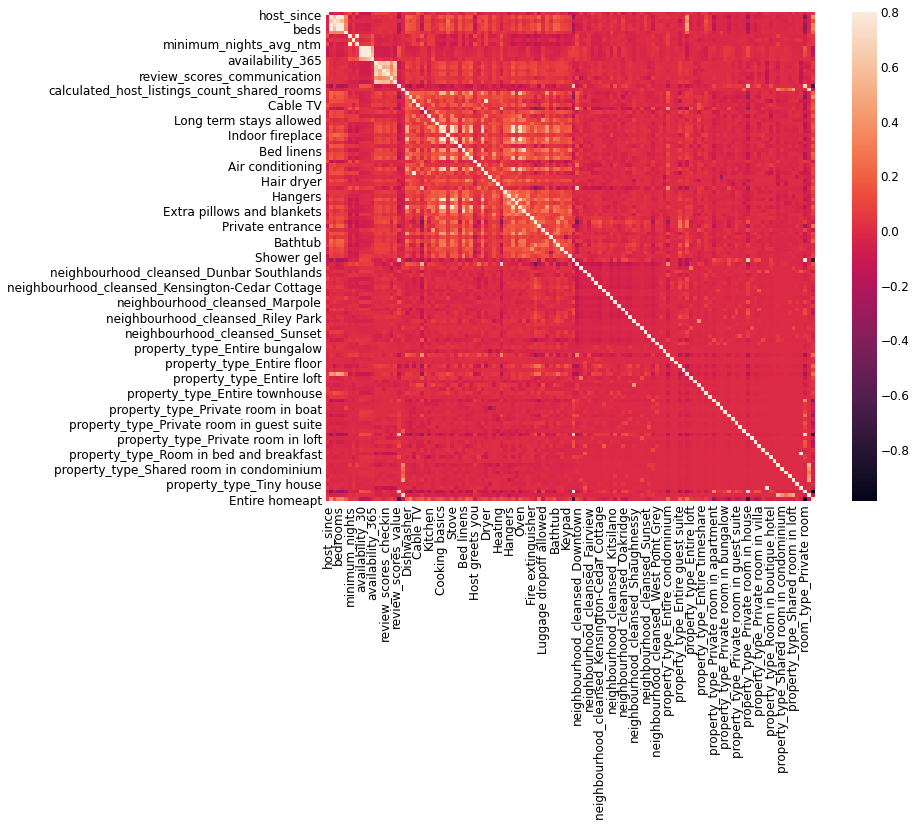

In [58]:
# Now lets view the top 8 correlated features with the accommodations price:
import seaborn as sns
corr_mat = bc_general_cleaned_final_with_dummies.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=0.8, square=True)

# Evaluate the first results


Identifying the top correlated columns:

In [59]:
top_correlations = bc_general_cleaned_final_with_dummies.corr()
top_feature_columns = top_correlations['price'][top_correlations['price'].values > 0.2].index.values
top_feature_columns

array(['accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'price',
       'property_type_Entire house'], dtype=object)

In [60]:
top_correlations

,host_since,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,Dishwasher,TV,Washer,Cable TV,Elevator,Carbon monoxide alarm,Kitchen,Long term stays allowed,Smoke alarm,Cooking basics,Refrigerator,Indoor fireplace,Stove,Hot water,Free parking on premises,Bed linens,Iron,Coffee maker,Host greets you,...,property_type_Entire cabin,property_type_Entire condominium,property_type_Entire cottage,property_type_Entire floor,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire house,property_type_Entire loft,property_type_Entire place,property_type_Entire serviced apartment,property_type_Entire timeshare,property_type_Entire townhouse,property_type_Entire villa,property_type_Private room in apartment,property_type_Private room in bed and breakfast,property_type_Private room in boat,property_type_Private room in bungalow,property_type_Private room in condominium,property_type_Private room in cottage,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in hostel,property_type_Private room in house,property_type_Private room in loft,property_type_Private room in townhouse,property_type_Private room in villa,property_type_Room in aparthotel,property_type_Room in bed and breakfast,property_type_Room in boutique hotel,property_type_Room in hotel,property_type_Shared room in apartment,property_type_Shared room in condominium,property_type_Shared room in hostel,property_type_Shared room in house,property_type_Shared room in loft,property_type_Tiny house,room_type_Hotel room,room_type_Private room,room_type_Shared room,Entire homeapt
host_since,1.000000,-0.073601,-0.021084,-0.024968,-0.053283,0.050723,0.128401,-0.061986,0.126102,-0.112691,-0.130490,-0.126948,0.055815,0.107447,0.073590,0.105158,0.084218,0.018786,0.051366,-0.116047,0.011520,0.031032,0.023340,-0.006526,0.153730,0.071079,-0.028313,0.009209,0.059324,-0.022348,-0.017676,-0.002117,0.056598,-0.022474,0.026385,-0.058145,-0.030174,0.062660,0.045799,0.134830,...,0.011806,-0.042747,-0.018137,-0.003690,0.009373,-0.015110,0.037087,0.047508,0.006995,-0.036996,0.065536,0.058774,-0.025872,0.019224,-0.005956,0.016151,-0.005049,-0.010782,-0.000595,-0.008008,-0.022700,0.006818,-0.049392,-0.006047,0.013077,-0.066997,0.004711,0.040657,-0.014079,-0.001970,-0.010111,-0.001692,0.006818,-0.024596,0.044124,-0.035177,0.040657,-0.051562,0.007470,0.047535
accommodates,-0.073601,1.000000,0.604821,0.838224,0.836656,0.363569,-0.093683,0.052021,-0.093494,-0.027962,-0.023533,-0.026175,0.026042,0.012113,0.031375,0.011932,0.011995,0.041316,0.003805,-0.283508,-0.022315,0.224643,0.210134,0.142036,0.074112,-0.104497,0.131660,0.133132,0.023523,0.068126,0.165393,0.118336,0.188906,0.166559,0.034952,0.190587,0.072039,0.148701,0.169544,-0.150669,...,0.019923,0.033872,0.005274,0.011826,-0.016638,0.025835,0.452263,-0.030394,0.002523,-0.031298,-0.024942,0.093431,0.037327,-0.175832,-0.024942,-0.017632,-0.026696,-0.116845,-0.020563,-0.046520,-0.021226,-0.012466,-0.296941,-0.006179,-0.070513,-0.024786,-0.013397,-0.021597,-0.021226,0.003728,-0.037092,-0.029084,-0.020563,0.016726,-0.021597,0.001096,-0.021597,-0.407316,-0.043248,0.412182
bathrooms_text,-0.021084,0.604821,1.000000,0.699544,0.576657,0.322596,-0.000180,0.003412,-0.000951,-0.004995,-0.005926,-0.013118,-0.003706,-0.027713,-0.011789,0.015295,0.005030,0.011487,0.014911,-0.002757,-0.021046,0.177556,0.094931,0.143599,0.045783,-0.082216,0.089575,0.099965,-0.012414,0.029388,0.064457,0.016571,0.255221,0.068328,-0.010490,0.138007,0.029526,0.091467,0.079732,-0.079304,...,0.004831,0.009073,-0.002398,-0.008222,-0.144528,-0.014187,0.342284,-0.034428,-0.0

In [61]:
top_correlations_df = bc_general_cleaned_final_with_dummies.loc[:,['accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'Entire homeapt','property_type_Entire house']]

In [62]:
#bc_general_cleaned_final_with_dummies_price = bc_general_cleaned_final_with_dummies.drop('range_of_prices',axis = 1)

# Data Modeling & Results
Let's check if we can predict the value of the prices, considering all columns that we have? At first attempt we will use the linear regression

In [63]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.25, rand_state=3):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''

    #Split into explanatory and response variables
    X = df.drop([response_col,'price'], axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(bc_general_cleaned_final_with_dummies, 'price', cat_cols_lst, dummy_na=False)
# make predictions for test data
y_pred = lm_model.predict(X_test)
predictions = [round(value) for value in y_pred]
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4354,55.0,138.890625
4282,99.0,123.710938
337,140.0,179.640625
1036,120.0,58.992188
4528,107.0,144.273438
...,...,...
352,169.0,190.773438
1521,118.0,156.765625
1324,41.0,51.664062
3798,129.0,89.765625


In [64]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.19884385066317445.  The rsquared on the test data was 0.25183560329985255.


Bad accuracy. Let's check XGBoost model

In [65]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [66]:
X = bc_general_cleaned_final_with_dummies.drop('price',axis=1)
Y = bc_general_cleaned_final_with_dummies['price']

In [67]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [68]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
3448,374.0,549.0
1315,36.0,85.0
1925,150.0,150.0
1477,66.0,89.0
2489,82.0,100.0
...,...,...
2042,75.0,75.0
3220,109.0,114.0
369,800.0,500.0
2109,249.0,199.0


In [70]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 5.78%


It continues as a bad accuracy. So let's evaluate if a range of values can be useful

In [71]:
for index,row in bc_general_cleaned_final_with_dummies.iterrows():
  valor = row['price']
  if valor < 50.0:
    bc_general_cleaned_final_with_dummies.at[index,'range_of_prices'] = 50.0
  elif (valor > 50.0) & (valor <100.0):
    bc_general_cleaned_final_with_dummies.at[index,'range_of_prices'] = 100.0
  elif (valor > 100.0) & (valor<150.0):
    bc_general_cleaned_final_with_dummies.at[index,'range_of_prices'] = 150.0
  elif (valor > 150.0) & (valor<200.0):
    bc_general_cleaned_final_with_dummies.at[index,'range_of_prices'] = 200.0
  elif (valor > 200.0) & (valor<250.0):
    bc_general_cleaned_final_with_dummies.at[index,'range_of_prices'] = 250.0
  elif (valor > 250.0) & (valor<300.0):
    bc_general_cleaned_final_with_dummies.at[index,'range_of_prices'] = 300.0
  else:
    bc_general_cleaned_final_with_dummies.at[index,'range_of_prices'] = 400.0

#Data Modeling & Results for new target

In [72]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.25, rand_state=3):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
 #   df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
  #  df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
   # df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
   # fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
   # df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop([response_col,'price'], axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(bc_general_cleaned_final_with_dummies, 'range_of_prices', cat_cols_lst, dummy_na=False)

In [73]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.36933701530714735.  The rsquared on the test data was 0.295610979095804.


In [74]:
X = bc_general_cleaned_final_with_dummies.drop(['range_of_prices','price'],axis=1)
Y = bc_general_cleaned_final_with_dummies['range_of_prices']

In [75]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [76]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [77]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
3448,400.0,400.0
1315,50.0,100.0
1925,400.0,400.0
1477,100.0,100.0
2489,100.0,100.0
...,...,...
2042,100.0,100.0
3220,150.0,150.0
369,400.0,400.0
2109,250.0,400.0


In [78]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 48.99%


#Conclusion

The use of range can be useful to help the person identify the greatness of the value which should be spend with accomodation

In [79]:
#top_correlations = bc_general_cleaned_final_with_dummies.corr()
#top_feature_columns = top_correlations['range_of_prices'][top_correlations['range_of_prices'].values > 0.2].index.values
#top_feature_columns

In [81]:
#top_correlations_df = bc_general_cleaned_final_with_dummies.loc[:,['accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'range_of_prices',
  #     'Entire homeapt','property_type_Entire house']]

In [ ]:
#X = top_correlations_df.drop('range_of_prices',axis=1)
#Y = top_correlations_df['range_of_prices']

In [ ]:
#X = bc_general_cleaned_final_with_dummies_price.drop('price',axis=1)
#Y = bc_general_cleaned_final_with_dummies_price['price']